# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
df = pd.read_csv('/content/diabetes.csv')

**Loading Data**

In [ ]:
df.head()
# load dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df[['Outcome']]

**Splitting Data**

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [ ]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifer
clf=DecisionTreeClassifier()

clf.fit(X_train,y_train)#Training the data
#X_train: This parameter represents the features (input variables) of the training data. It's typically a 2-dimensional
#array or DataFrame where each row corresponds to a sample and each column corresponds to a feature.
#y_train: This parameter represents the target labels (output variable) of the training data.
# It's typically a 1-dimensional array or Series containing the target labels corresponding to each sample in X_train.
#Predict the response for test dataset
y_pred=clf.predict(X_test)
print(y_pred)


[0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0]


**Evaluating Model**

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#metrics play a critical role in evaluating the performance of models.
#These metrics provide quantitative measures of how well a machine learning model
#is performing on a given task.

Accuracy: 0.703125


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [ ]:
!pip install graphviz
!pip install six
!pip install pydotplus

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus

export_graphviz(clf, feature_names=X_train.columns,class_names=df.columns, filled=True)


'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Glucose <= 129.5\\ngini = 0.452\\nsamples = 576\\nvalue = [377, 199]\\nclass = Pregnancies", fillcolor="#f3c4a2"] ;\n1 [label="Age <= 28.5\\ngini = 0.325\\nsamples = 382\\nvalue = [304, 78]\\nclass = Pregnancies", fillcolor="#eca16c"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="BMI <= 45.4\\ngini = 0.191\\nsamples = 215\\nvalue = [192, 23]\\nclass = Pregnancies", fillcolor="#e89051"] ;\n1 -> 2 ;\n3 [label="BMI <= 30.45\\ngini = 0.165\\nsamples = 210\\nvalue = [191, 19]\\nclass = Pregnancies", fillcolor="#e88e4d"] ;\n2 -> 3 ;\n4 [label="Pregnancies <= 7.5\\ngini = 0.05\\nsamples = 116\\nvalue = [113, 3]\\nclass = Pregnancies", fillcolor="#e6843e"] ;\n3 -> 4 ;\n5 [label="Glucose <= 128.5\\ngini = 0.034\\nsamples = 115\\nvalue = [113, 2]\\nclass = Pregnancies", fillcolor="#e5833d"] ;\n4 -> 5 ;\n6 [label="DiabetesPedigreeFunction

**Optimizing Decision Tree Performance**

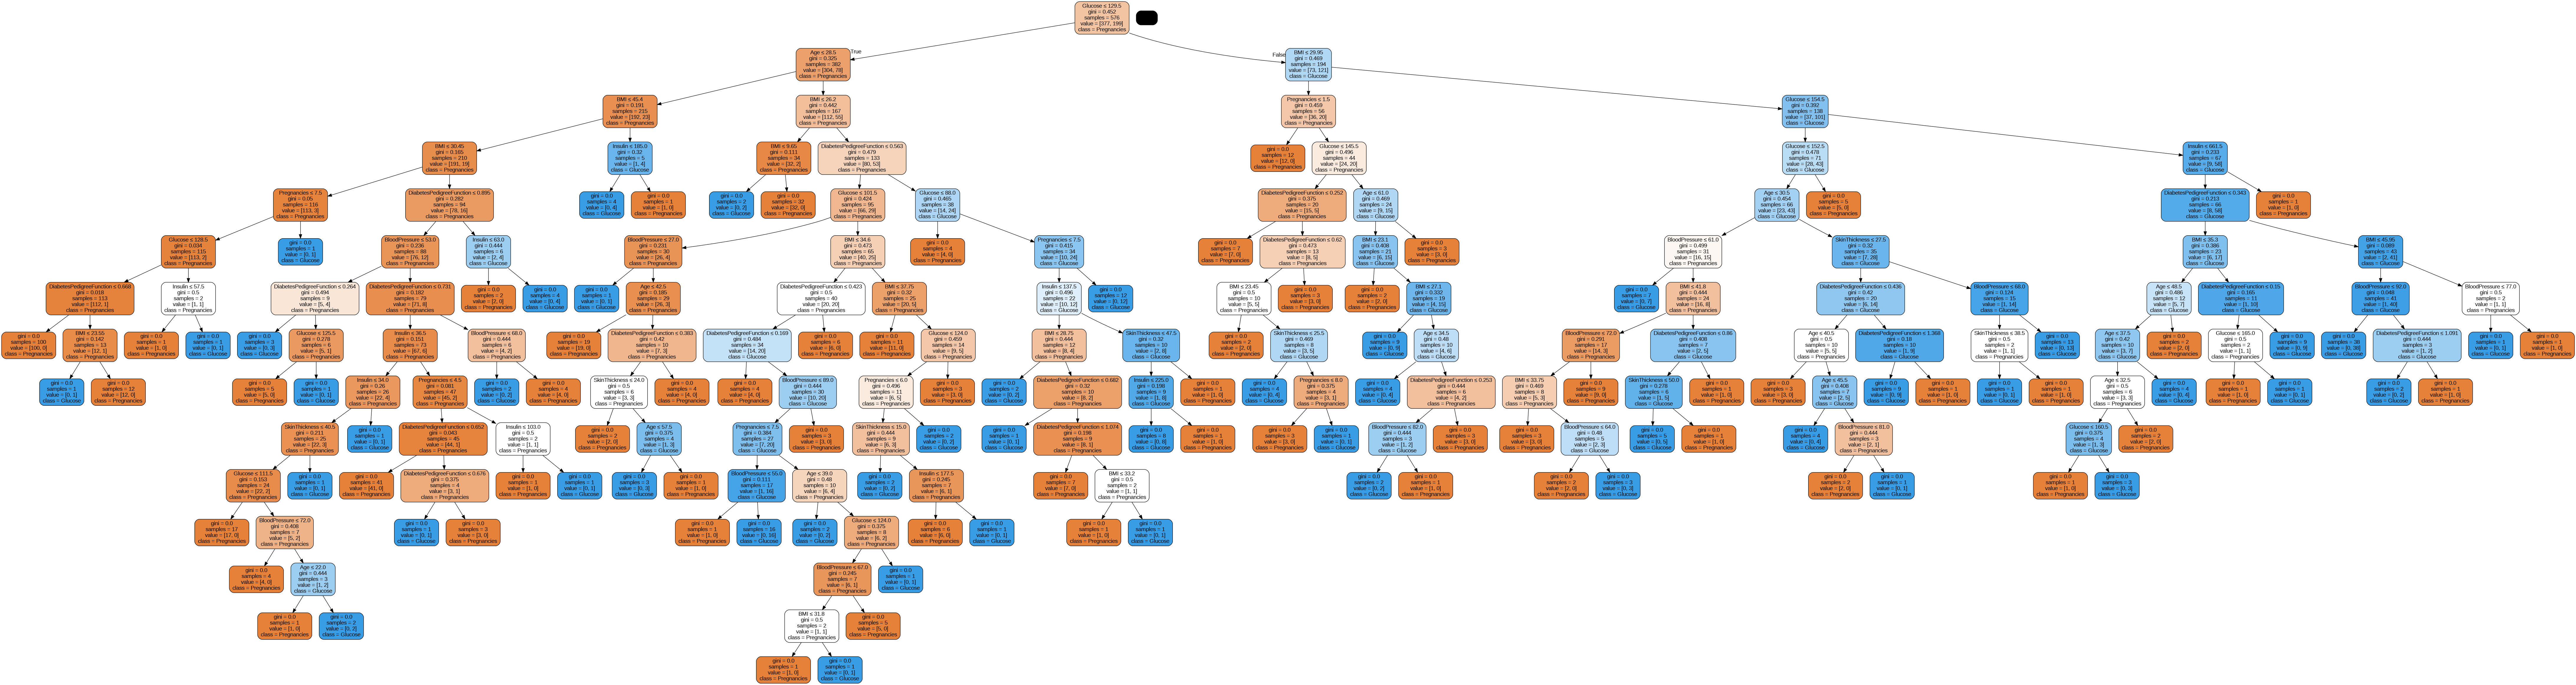

In [ ]:

from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=df.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [ ]:
# Create Decision Tree classifer object
clf2=DecisionTreeClassifier(max_depth=4,criterion='entropy')
# Train Decision Tree Classifer
clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2=clf2.predict(X_test)
print(y_pred2)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0]
Accuracy: 0.734375


**Visualizing Decision Trees**

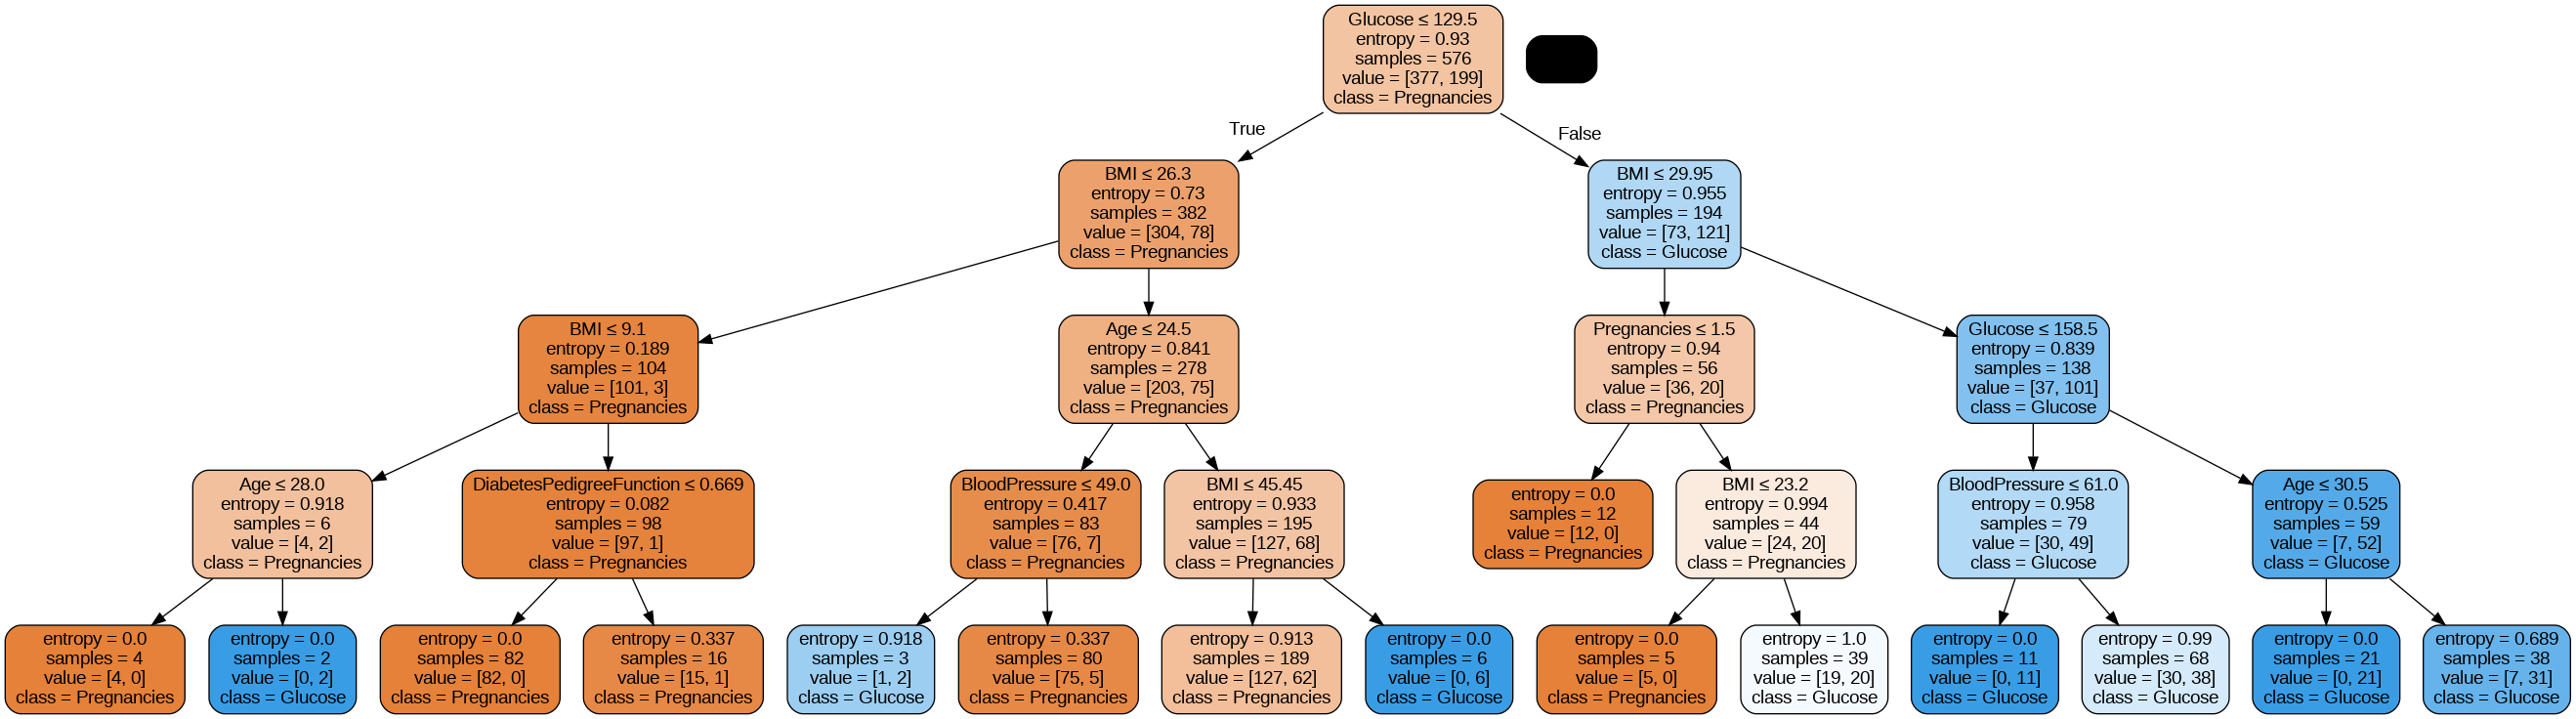

In [ ]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=X_train.columns, class_names=df.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Implement Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create RandomForest Tree classifer object
clf3=RandomForestClassifier()
# Train RandomForest Tree Classifer
clf3.fit(X_train,y_train)
#Predict the response for test dataset
y_pred3=clf3.predict(X_test)
print(y_pred3)
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0]
Accuracy: 0.796875


<ipython-input-50-b2590209c9d1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_train,y_train)


If the model overfitting try out different way to fix it!!

In [ ]:
# prompt: If the model overfitting try out different way to fix it!




### All the best!!! I hope you will Enjoy the Task!